-------------------------------------
# **Customers churn prediction**
-------------------------------------

**Introduction**

In this project, we delve into the task of predicting customer churn in a banking dataset. Customer churn is a phenomenon of customers leaving a service, is a critical challenge for businesses, including banks. Our primary goal is to implement and evaluate binary classification models to predict which customers are likely to churn. The dataset encompasses various customer attributes, such as credit score, country, gender, age, tenure, balance, number of products, credit card, active membership status, and estimated salary. The target variable, 'churn,' indicates whether a customer has left the bank (1) or not (0).

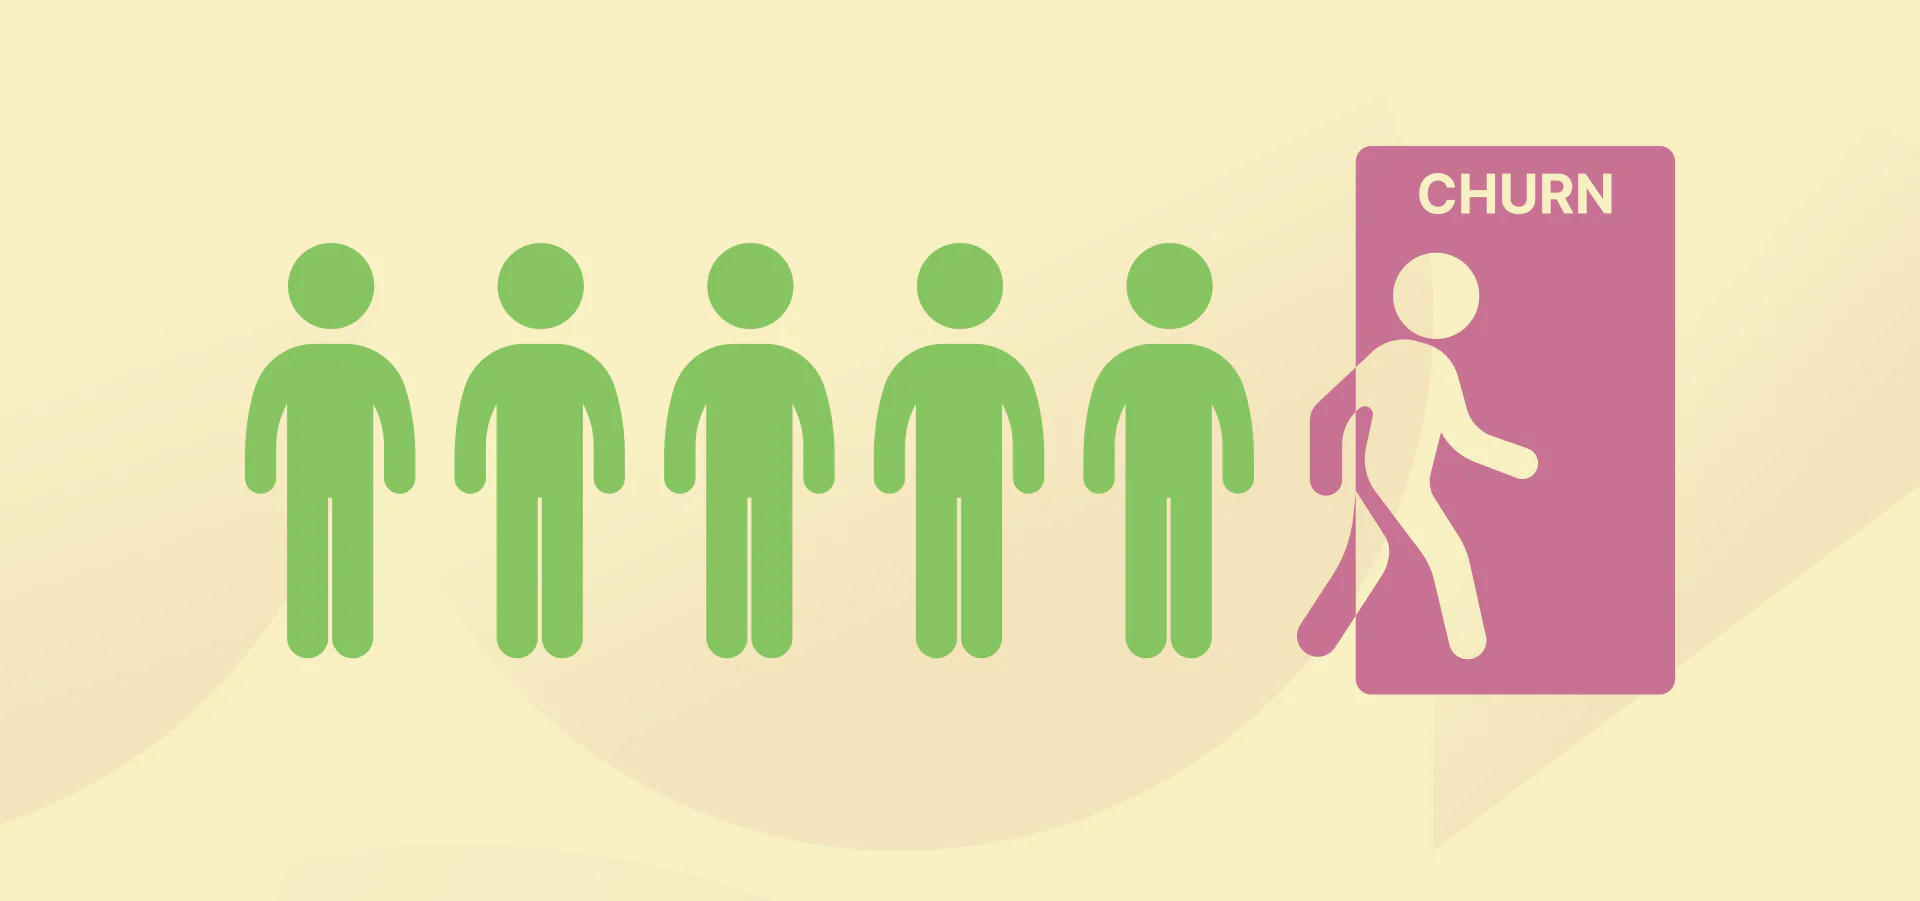

I initiated my exploration with an in-depth **Exploratory Data Analysis (EDA)**, uncovering insights into the dataset's structure and characteristics. Feature engineering was employed to enhance the predictive capabilities of the models. Subsequently, I implemented **Logistic Regression** and **K-Nearest Neighbors (KNN)** models using only **NumPy**. 

As part of the preprocessing steps, I conducted feature engineering to extract meaningful information from the raw data. And then standardized the data to ensure that all features have the same scale. To evaluate the models, data is split into training and testing sets in an **80-20** ratio.

The models were evaluated based on their accuracy, which is a measure of the proportion of correct predictions made by the model. This metric provides a straightforward way to understand the performance of the models

----------------------------
## **Loading the dataset**
----------------------------

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
churn = pd.read_csv('Bank.csv') # Reading the dataset

In [3]:
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print(f'This dataset has {churn.shape[0]} rows and {churn.shape[1]} columns.')

This dataset has 10000 rows and 12 columns.


In [5]:
# Creating a copy of the original data for manipulation and further processing

df = churn.copy()

In [6]:
# Removing 'customer_id' since it is not required

df = df.drop('customer_id',axis=1)


In [7]:
# Checking the data column types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# looking at each columns unique values

def checking_columns(data):
  col_names = data.columns.values

  for col_name in col_names:
    no_of_values = data[col_name].nunique()
    values_of_col = data[col_name].unique()
    print('------------------------------------------------------------------------------------------------')
    print(f'Columns {col_name} has {no_of_values} unique values in it and they are: {values_of_col}')

checking_columns(df)

------------------------------------------------------------------------------------------------
Columns credit_score has 460 unique values in it and they are: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 

In [9]:
# checking missing values visually

df.isnull().sum()

# Here we can see there are no missing values in the dataset

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [10]:
# Checking for duplicates

duplicates = df[df.duplicated()]
print('Duplicate rows:')
print(duplicates)

# Here we can see there are no duplicate values in the dataset

Duplicate rows:
Empty DataFrame
Columns: [credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []


In [11]:
# Checking statistical summary of numerical columns

df.describe()

# Here we can see the banking customers has an average credit score of 650 and a diverse age distribution ranging
# from 18 to 92. Customers typically stay with the bank for around 5 years, and their account balances exhibit 
# notable variability, ranging from 0 to 250,898.09 units. The majority of customers have one or two products, 
# and approximately 20.37% have churned. Active membership and credit card ownership are common among customers, 
# with estimated salaries varying widely.

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


----------------------------
# **Feature Engineering**
----------------------------
For better understanding of customer demographics, created new features such as:

  * **age_category**:
    * This feature categorizes customers based on their age, providing a more granular view of age groups to identify potential patterns or trends in financial behaviors.

  * **balance_salary_ratio**:
    * The ratio between a customer's account balance and their salary, offering insights into how well individuals manage their finances in relation to their income.

  * **credit_score_category**:
    * Categorizes customers based on their credit scores, allowing for the segmentation of individuals with different creditworthiness levels, which can influence financial decisions.

  * **above_average_balance**:
    * A binary indicator that flags whether a customer's account balance is above the average, helping identify customers with relatively higher balances.

  * **salary_per_product**:
    * This feature calculates the salary earned per product held by the customer, providing insights into the distribution of income across various financial products.

  * **churn_rate_by_country**:
    * This feature computes the churn rate specific to each customer's country, helping to analyze and understand customer retention patterns on a regional basis.


In [12]:
# Age Categories

age_bins = [0, 30, 40, 60, 120]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged


In [13]:
# Balance to Salary Ratio

df['balance_salary_ratio'] = df['balance'] / df['estimated_salary']
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055


In [14]:
# Credit Score Categories

credit_bins = [0, 600, 700, 800, float('inf')]
credit_labels = ['Low', 'Medium', 'High', 'Excellent']
df['credit_score_category'] = pd.cut(df['credit_score'], bins=credit_bins, labels=credit_labels, right=False)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio,credit_score_category
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000,Medium
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677,Medium
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375,Low
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,Medium
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055,Excellent


In [15]:
# Balance Status

average_balance = df['balance'].mean()
df['above_average_balance'] = (df['balance'] > average_balance).astype(int)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio,credit_score_category,above_average_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000,Medium,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677,Medium,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375,Low,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,Medium,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055,Excellent,1


In [16]:
# Estimated Salary per Product

df['salary_per_product'] = df['estimated_salary'] / df['products_number']
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio,credit_score_category,above_average_balance,salary_per_product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000,Medium,0,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677,Medium,1,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375,Low,1,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,Medium,0,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055,Excellent,1,79084.100


In [17]:
# Churn Rate in Country

churn_rate_by_country = df.groupby('country')['churn'].mean()
df['churn_rate_by_country'] = df['country'].map(churn_rate_by_country)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio,credit_score_category,above_average_balance,salary_per_product,churn_rate_by_country
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000,Medium,0,101348.880,0.161548
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677,Medium,1,112542.580,0.166734
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375,Low,1,37977.190,0.161548
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,Medium,0,46913.315,0.161548
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055,Excellent,1,79084.100,0.166734


------------------------------------
# Exploratory Data Analysis (EDA)
------------------------------------

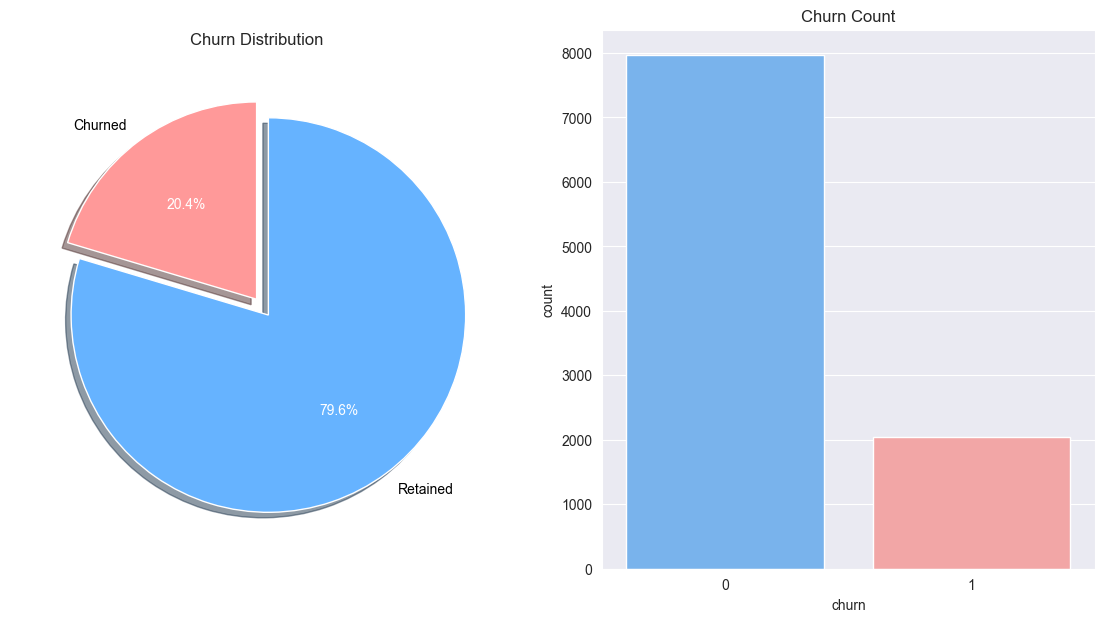

In [18]:
# Target Label Analysis

# Colors & labels
colors = ["#ff9999", "#66b3ff"]
labels = 'Churned', 'Retained'

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
explode = (0, 0.1)
wedges, texts, autotexts = axs[0].pie(sizes, explode=explode, labels =labels ,autopct='%1.1f%%',
                                     textprops={'fontsize': 10, 'color': 'black'}, shadow=True, startangle=90, colors=colors)
axs[0].set_title('Churn Distribution')

# percentage labels
for autotext in autotexts:
    autotext.set_color('white')

# Countplot
sns.countplot(x='churn', data=df, palette=["#66b3ff","#ff9999"], ax=axs[1], hue=None)
axs[1].set_title('Churn Count')

plt.show()

# From the below plots we can see at 20.4%, the bank's churn rate is comparatively high, meaning that during this 
# time, it is losing a fifth of its customer base. This can be a sign of intense competition, 
# unsatisfied customers, or other problems that undermine client loyalty for the bank.


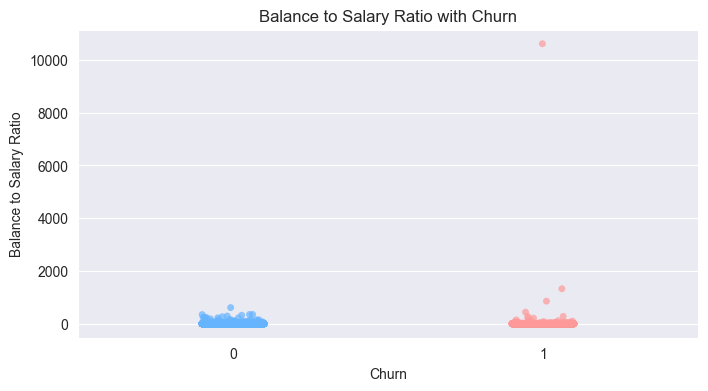

In [19]:
# Balance to Salary Ratio

# Using Jitter plot
plt.figure(figsize=(8, 4))
sns.stripplot(x='churn', y='balance_salary_ratio', data=df, jitter=True, palette=["#66b3ff","#ff9999"], alpha=0.7)

# plot labels and axis
plt.title('Balance to Salary Ratio with Churn')
plt.xlabel('Churn')
plt.ylabel('Balance to Salary Ratio')
plt.show()


# The below jitter plot illustrates the balance to salary ratio distribution among bank customers, categorized by 
# churn status. A higher ratio suggests more funds relative to income. While most churning customers had a low 
# ratio, indicating potential dissatisfaction, some with a high ratio left for reasons like relocation or retirement

# The plot reveals variability in non-churning customers, suggesting loyalty or a lack of incentive to switch,
# emphasizing that the balance to salary ratio alone might not predict churn reliably.


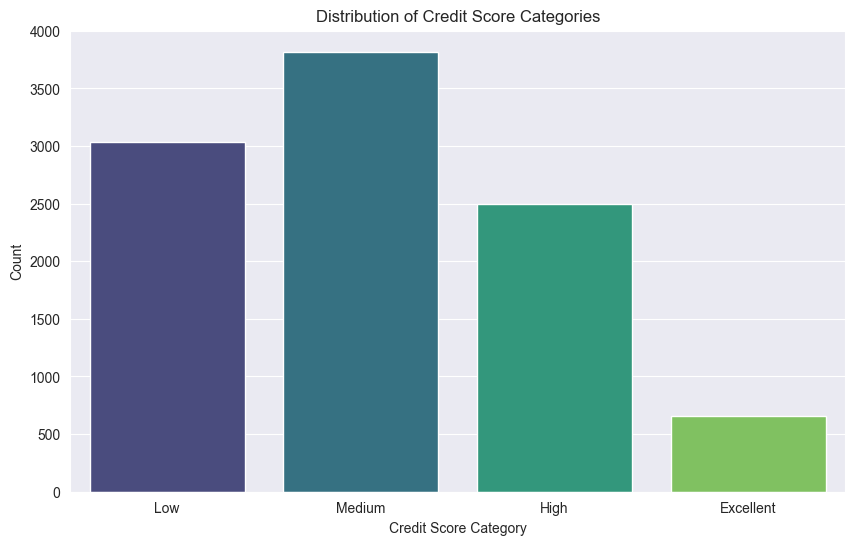

In [20]:
# Distribution of Credit Score Categories

# Count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='credit_score_category', data=df, palette='viridis')

# plot labels and axis
plt.title('Distribution of Credit Score Categories')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
plt.show()

# The below plot highlights a predominant distribution of medium to low credit scores among customers, with a 
# substantial frequency in the medium category. The lower number of customers in the excellent category suggests
# potential challenges in loan repayment, emphasizing the credit score as a crucial predictor of customer churn.


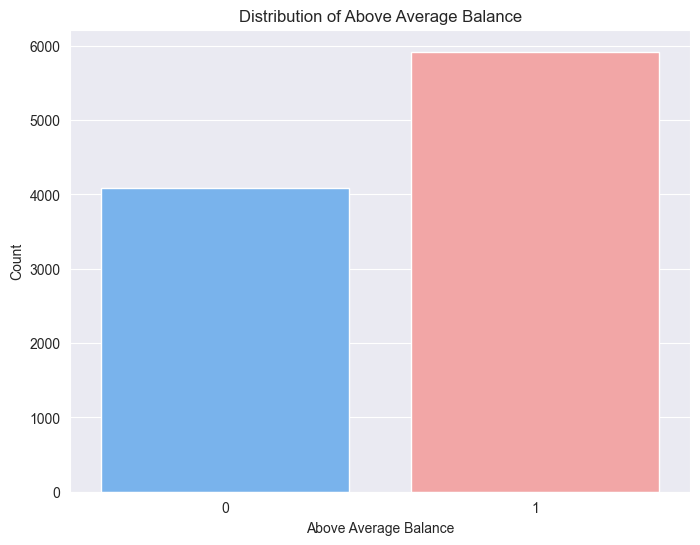

In [21]:
# Distribution of Above Average Balance

# Creating a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='above_average_balance', data=df, palette=["#66b3ff", "#ff9999"])

# Plot label and axis
plt.title('Distribution of Above Average Balance')
plt.xlabel('Above Average Balance')
plt.ylabel('Count')
plt.show()

# The below plot illustrates a majority of customers with above-average balances, suggesting a substantial portion 
# has significant account funds. This could potentially impact customer churn, linking the balance to both 
# financial standing and satisfaction with the bank.


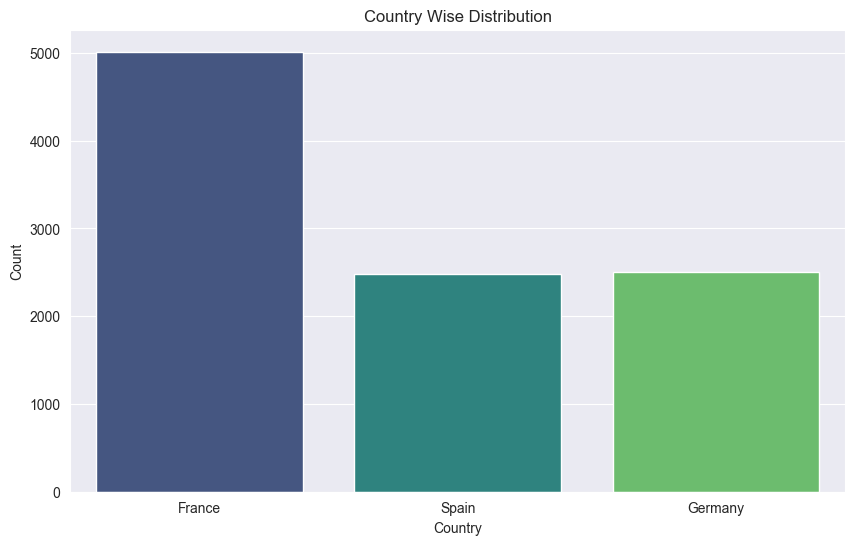

In [22]:
# Country Distribution

plt.rcParams['figure.figsize'] = (10, 6)

# Count plot
ax = sns.countplot(x='country', data=df, palette='viridis')

# axis labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Wise Distribution')
plt.show()


# The below plot reveals an imbalance in the dataset, with France having the highest customer count, followed by 
# Germany and Spain. The country factor could be significant in understanding customer churn, reflecting diverse 
# preferences, needs, and expectations.


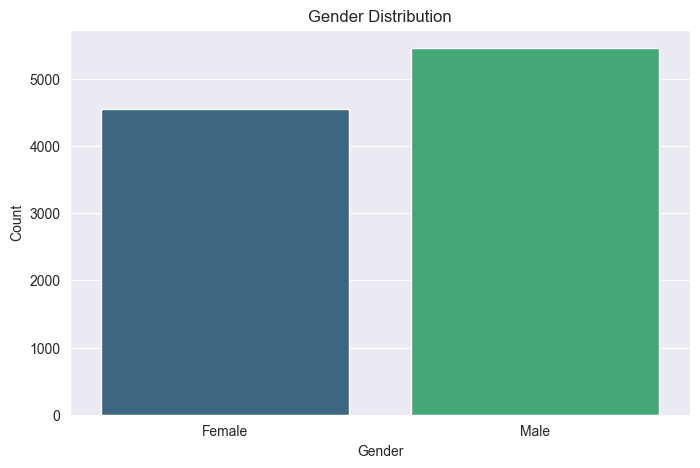

In [23]:
# Gender Distribution

plt.rcParams['figure.figsize'] = (8, 5)

# Gender Distribution with Count Numbers
ax = sns.countplot(x='gender', data=df, palette='viridis')

# axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')
plt.show()


# The below plot indicates a gender imbalance in the dataset, with more males than females. This suggests a 
# potential relevance of gender in understanding customer churn, reflecting diverse preferences, needs & expectations


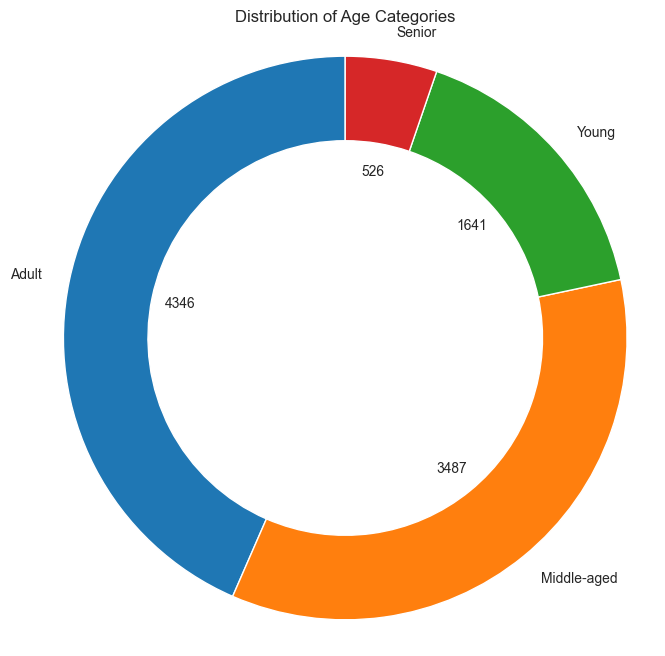

In [24]:
# Distribution of Age Categories

# Creating a donut chart
plt.figure(figsize=(8, 8))
age_category_counts = df['age_category'].value_counts()

# donut chart
wedges, texts, autotexts = plt.pie(age_category_counts, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), labels=None)

# Adding labels to each section
for i, (wedge, text, autotext) in enumerate(zip(wedges, texts, autotexts)):
    text.set_text(f'{age_category_counts.index[i]}')
    autotext.set_text(f'{age_category_counts[i]}')
    plt.setp(wedge, edgecolor='white')

# Labels and title
plt.axis('equal')
plt.title('Distribution of Age Categories')
plt.show()

# The below chart highlights that adults (aged between 30-40) constitute the majority of the dataset at 43.5%, 
# followed by middle-aged customers (aged between 40-60) at 26.2% reflecting diverse life stages of the bank 
# customers.


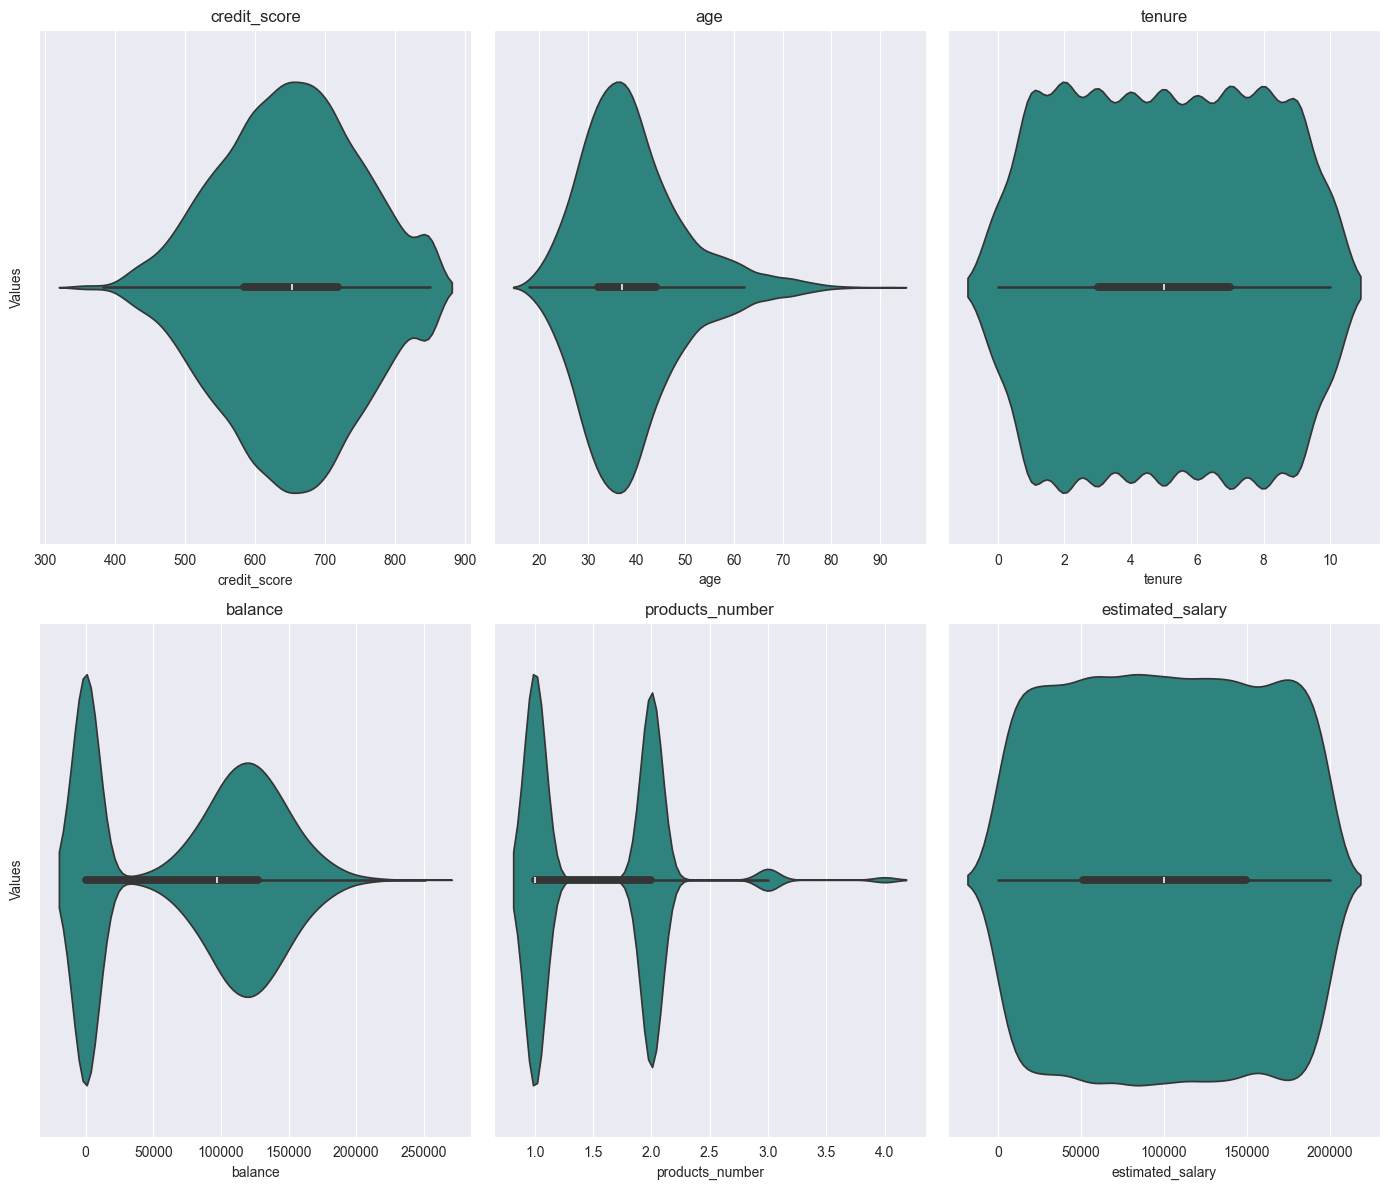

In [25]:
# Plotting Numerical Features

# plot size
plt.rcParams['figure.figsize'] = (14, 12)

# Selecting Numerical Columns for Violin Plots
selected_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True)
axs = axs.flatten()

# Looping through selected columns
for i, column in enumerate(selected_columns):
    sns.violinplot(x=df[column], ax=axs[i], palette='viridis')
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


# The below violin plots reveal key features' distributions where Credit_score is slightly right-skewed,
# Age shows more younger customers, Tenure has a somewhat uniform distribution with common tenures,
# Balance indicates two customer groups, Products_number is discrete, and Estimated_salary is nearly uniform.
# Understanding these distributions helps assess their potential impact on customer churn.


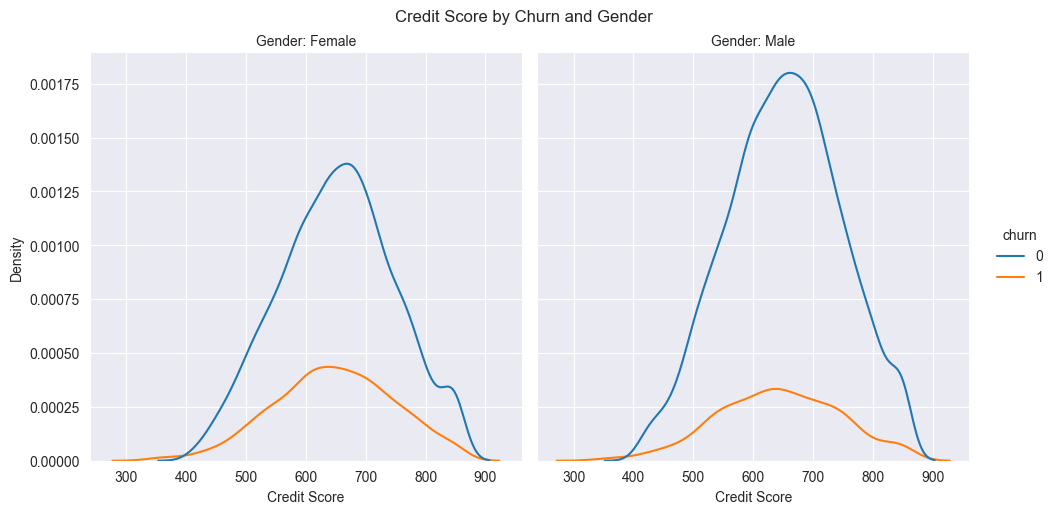

In [26]:
# Credit Score by Churn and Gender using KDE

# Displot with KDE
displot = sns.displot(data=df, x="credit_score", hue="churn", col="gender", kind="kde")

# labels and titles
displot.set_axis_labels("Credit Score", "Density")
displot.set_titles("Gender: {col_name}")
displot.fig.suptitle("Credit Score by Churn and Gender", y=1.02)
plt.show()

# The below visualizations highlight that customers who haven't churned generally possess higher credit scores 
# irrespective of gender. Gender appears to have a minimal impact on credit scores or churn rates. Thus, credit 
# score emerges as a potential predictor for customer churn, reflecting financial stability and creditworthiness.


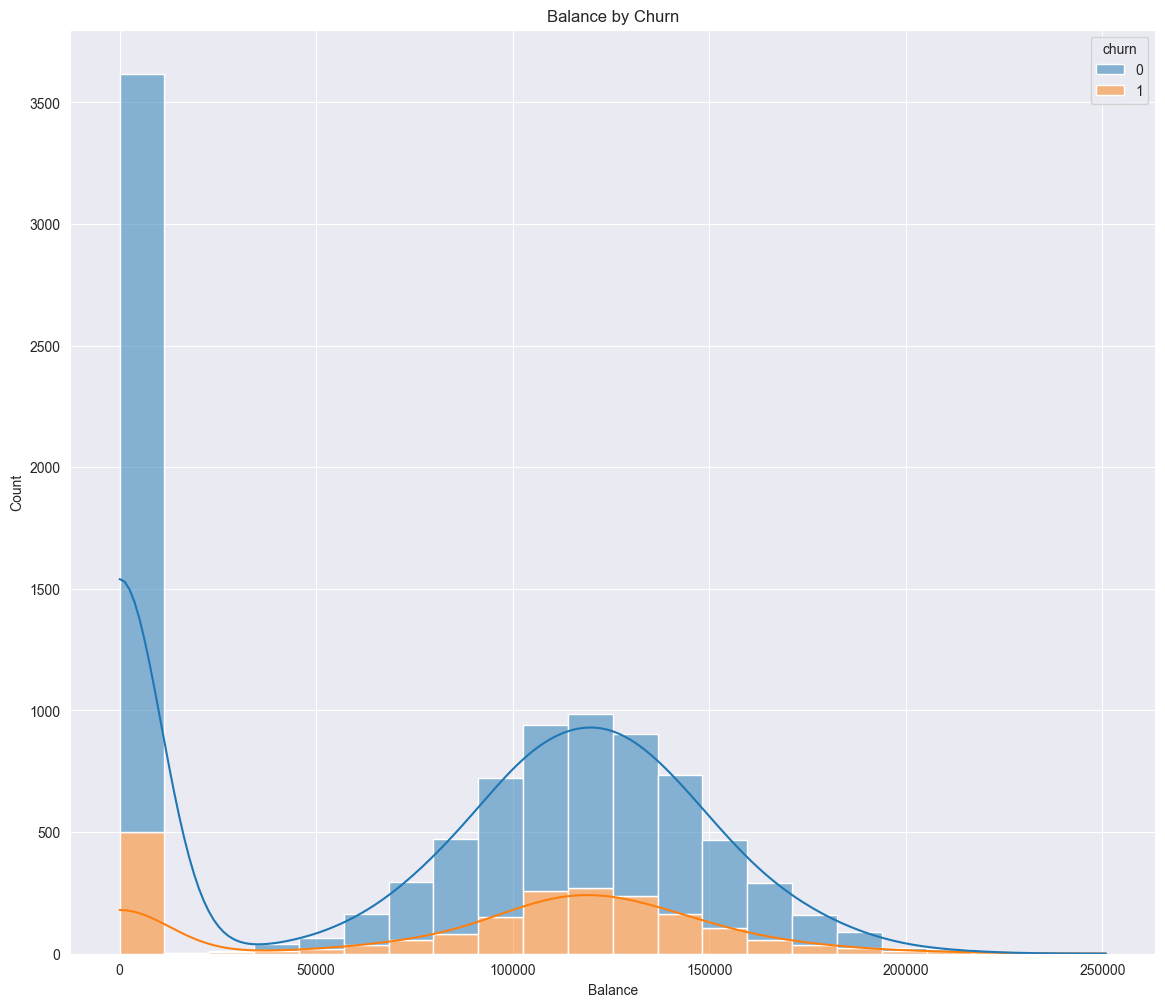

In [27]:
# Balance by Churn

# Histplot with KDE
histplot = sns.histplot(data=df, x="balance", hue="churn", multiple="stack", kde=True)

# labels and title
histplot.set(xlabel="Balance", ylabel="Count")
histplot.set_title("Balance by Churn")
plt.show()

# The below visualization indicates that a significant portion of customers with low or zero balances hasn't 
# churned, with a pronounced peak at the lower end. Another group, characterized by more evenly distributed 
# balances peaking around 100,000, has a smaller proportion of churned customers. However, the plot suggests that 
# balance amount alone may not be a robust predictor of customer churn due to overlaps and variations in both groups


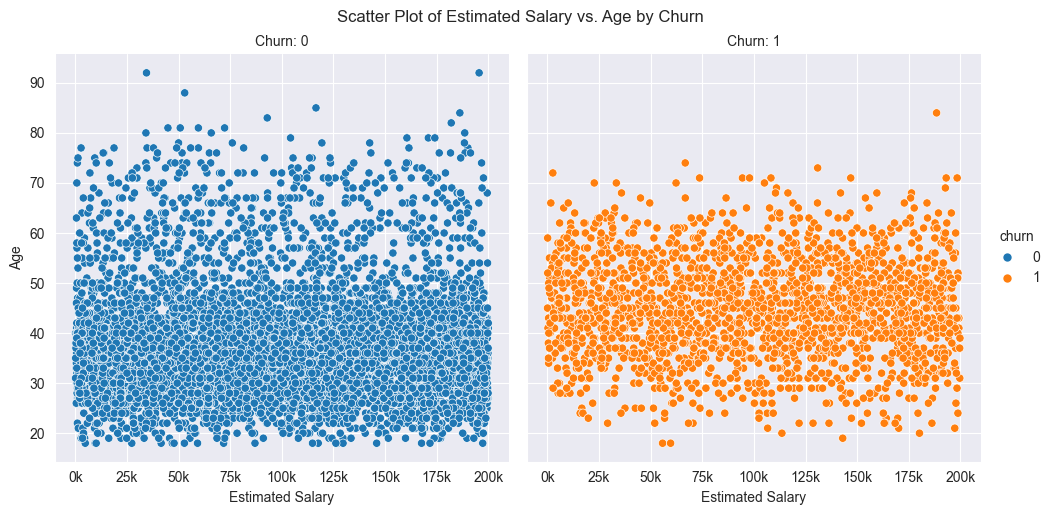

In [28]:
# Salary vs Age by Churn

#  plot size
plt.rcParams['figure.figsize'] = (14, 7)

# Relplot with Scatter Plot
relplot = sns.relplot(
    data=df, x="estimated_salary", y="age",
    col="churn", hue='churn',
    kind="scatter"
)

# axis labels and title
relplot.set_axis_labels("Estimated Salary", "Age")
relplot.set_titles("Churn: {col_name}")
relplot.fig.suptitle("Scatter Plot of Estimated Salary vs. Age by Churn", y=1.02)
plt.xticks(np.arange(0, 200001, 25000), [f'{i}k' for i in range(0, 201, 25)])
plt.show()

# The below scatter plots indicate a lack of clear correlation between estimated salary and age for both churn and 
# non-churn customers, as data points are widely scattered. Additionally, there's no significant difference in the 
# distribution of estimated salary and age between churn and non-churn customers, suggesting that these factors may
# not be robust predictors of customer churn due to the absence of distinct trends or patterns.


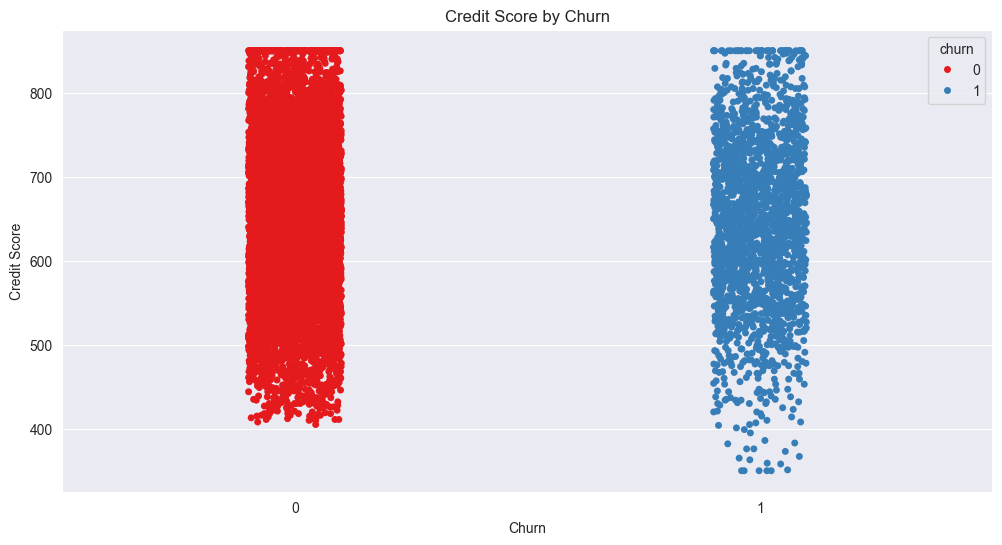

In [29]:
# Credit Score by Churn using strip plot

plt.figure(figsize=(12, 6))
sns.stripplot(x='churn', y='credit_score', data=df,  palette='Set1', hue='churn')
plt.title('Credit Score by Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

# The below visualization reveals no evident distinction in credit scores between customers who churned and 
# those who did not, with widespread scattering across both categories. Most customers fall within the credit score
# range of 600 to 800, irrespective of their churn status, indicating that credit score may not serve as a robust 
# predictor for customer churn due to the absence of distinct patterns or trends.


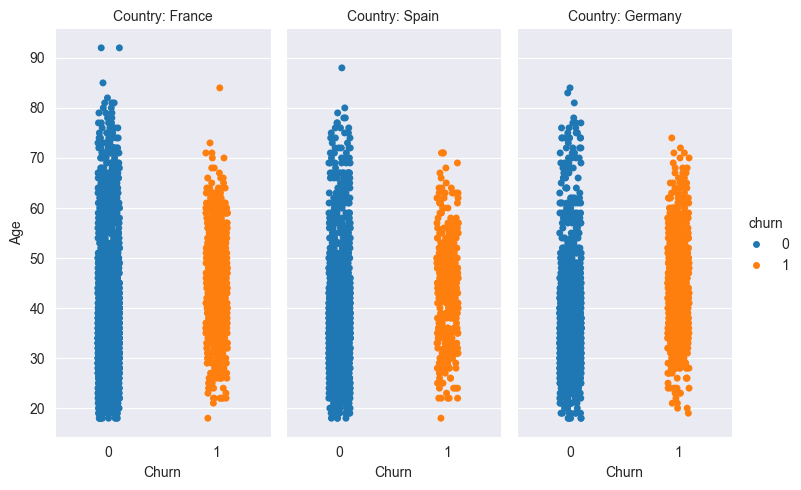

In [30]:
# Churn Distribution with AGE by country


# Catplot
catplot = sns.catplot(data=df, x="churn", y="age", hue="churn", col="country", aspect=.5)

# titles and labels
catplot.set_axis_labels("Churn", "Age")
catplot.set_titles("Country: {col_name}")
plt.show()

# The below plot indicates an absence of a clear association between age and churn rate across the three countries,
# with mixed data points for both churned and retained categories across various age ranges.
# Additionally, there is no substantial difference in churn rates among the countries, implying that age and 
# country may not be robust predictors for customer churn due to the lack of distinct patterns or trends.


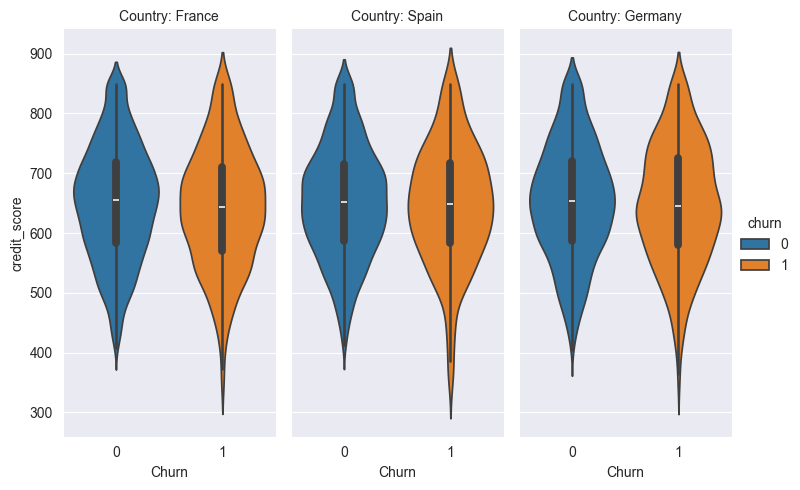

In [31]:
# Credit score distribution with churn by country

# Catplot
catplot = sns.catplot(data=df, x="churn", y="credit_score", kind="violin", hue="churn", col="country", aspect=.5)

# titles and labels
catplot.set_axis_labels("Churn", "credit_score")
catplot.set_titles("Country: {col_name}")
plt.show()

# The below violin plot reveals a lack of discernible disparities in credit scores between churned and non-churned
# customers across France, Spain, and Germany. Most customers, irrespective of country or churn status, fall within
# the credit score range of 600 to 700, suggesting that credit score may not be a reliable predictor of customer 
# churn, lacking distinct patterns or trends associated with churn rates or specific countries.


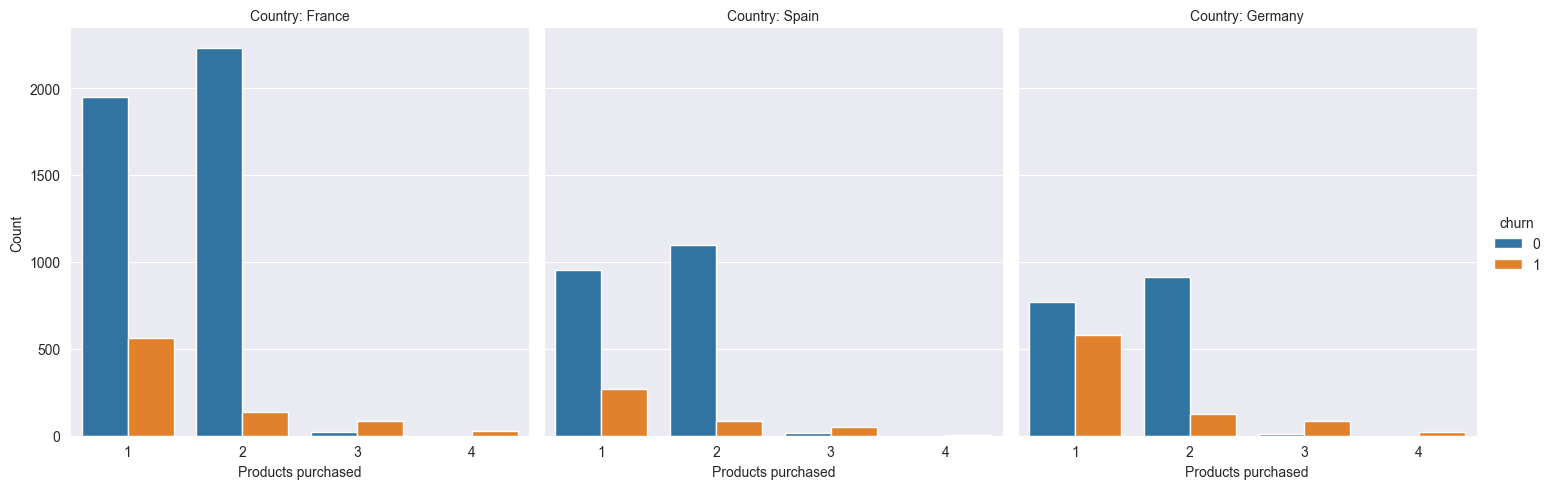

In [32]:
# No of products purchased with churn by country

# Catplot with Count Plot
catplot = sns.catplot(data=df, x="products_number", hue="churn", col="country", kind='count')

# titles and labels
catplot.set_axis_labels("Products purchased", "Count")
catplot.set_titles("Country: {col_name}")
plt.show()

# The below bar charts indicate that customers who bought two products were less likely to churn compared to 
# customers who bought a single product, regardless of their country. However, as the number of purchased products
# rises, the churn rate decreases. Specifically, France has the highest count of non-churning customers who bought 
# two products, followed by Spain and Germany, suggesting that the number of products bought might be a reliable 
# predictor of customer churn, exhibiting a clear pattern related to both churn rates and countries.


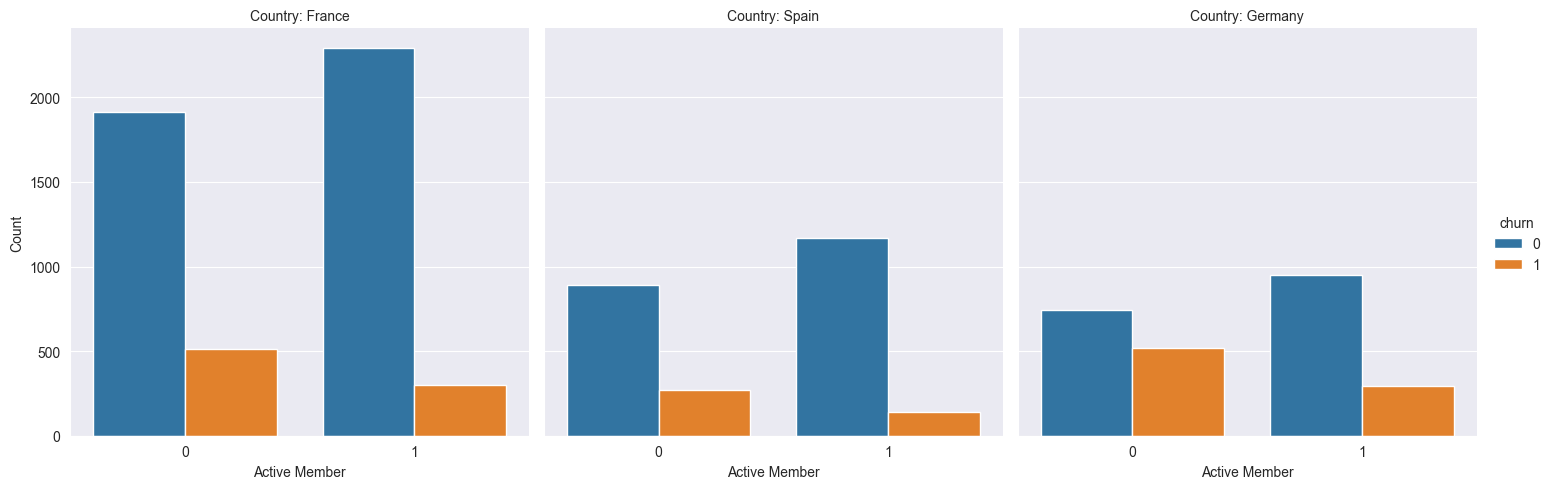

In [33]:
# Distribution of active members with churn by country

# Catplot with Count Plot
catplot = sns.catplot(data=df, x="active_member", hue="churn", col="country", kind='count')

# titles and labels
catplot.set_axis_labels("Active Member", "Count")
catplot.set_titles("Country: {col_name}")
plt.show()

# The below plot reveals that active members exhibit a lower churn rate than inactive members across all three 
# countries, evident from the higher blue bars for active members and lower orange bars for inactive members.
# France tops both active and inactive non-churning members, followed by Germany and Spain.

# The plot suggests that active membership is a potential predictor of customer churn, displaying a discernible 
# pattern and trend linked to both churn rates and countries.


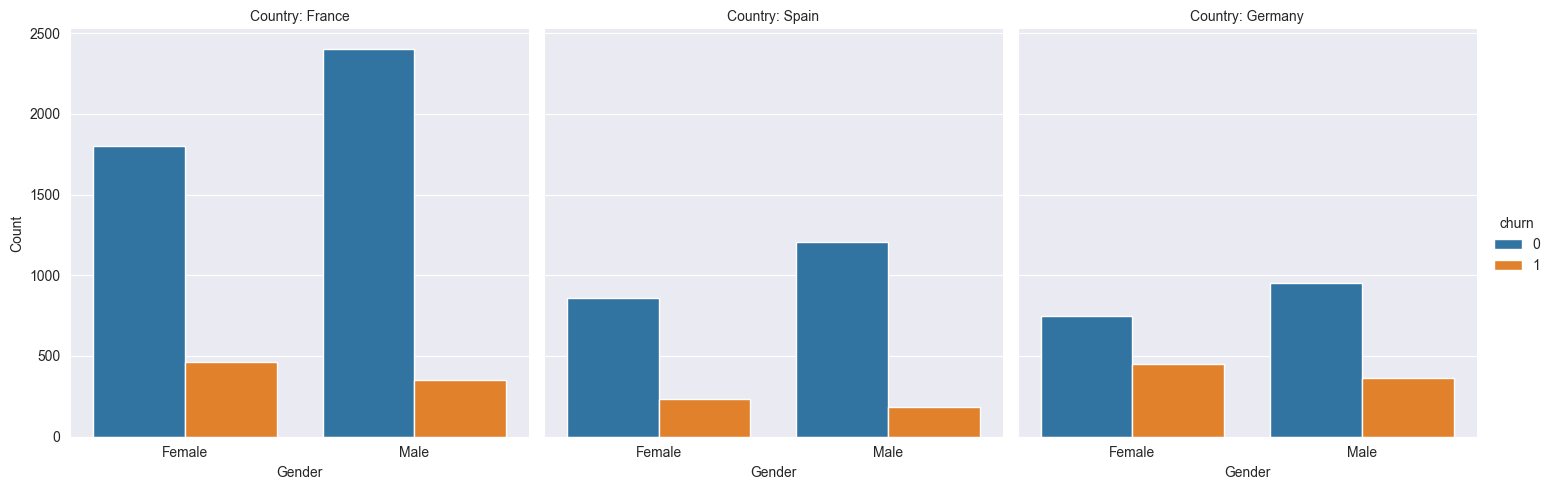

In [34]:
# Distribution of Gender with churn by country

# Catplot with Count Plot
catplot = sns.catplot(data=df, x="gender", hue="churn", col="country", kind='count')

# titles and labels
catplot.set_axis_labels("Gender", "Count")
catplot.set_titles("Country: {col_name}")
plt.show()

# The below plots indicates a gender imbalance, with more males than females across all three countries,
# and highlights a higher churn rate among females. France stands out with the highest overall customer count,
# followed by Germany and Spain. Gender and country emerge as potentially relevant factors in customer churn,
# demonstrating variations in churned and retained customer proportions and frequencies.


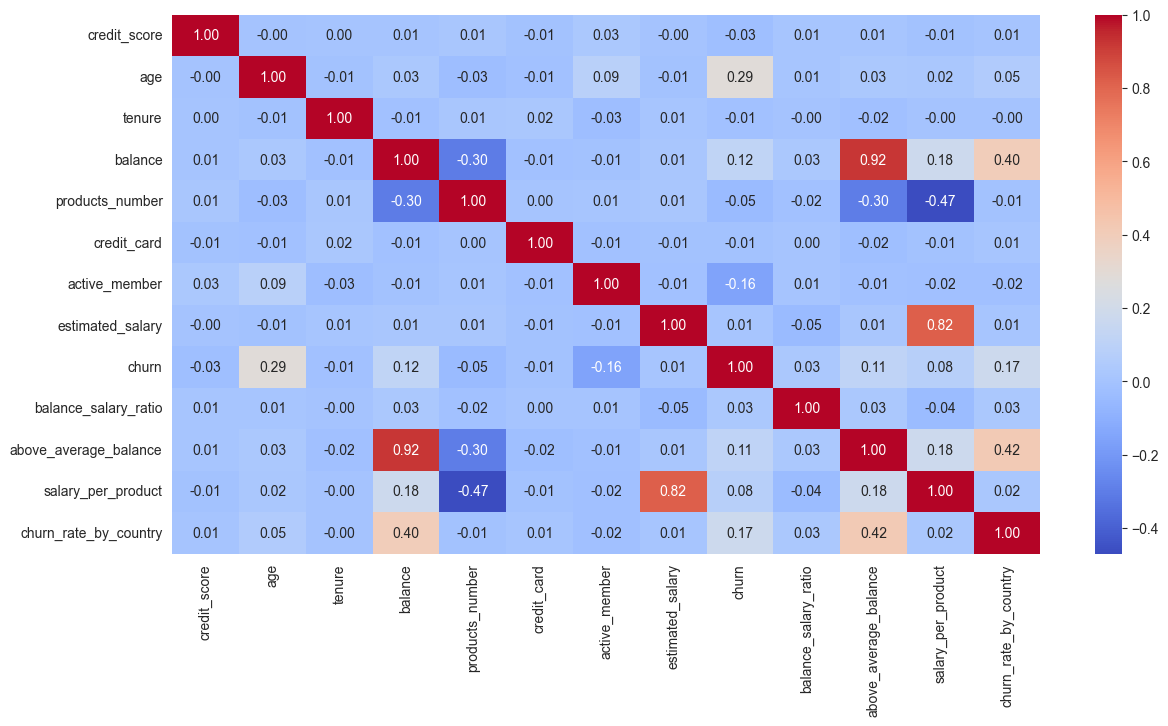

In [35]:
# Correlation Matrix

df_num = df.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# The below heatmap reveals correlation coefficients between variables, emphasizing a positive correlation between
# age and churn (0.29), suggesting older customers are more prone to churn. A negative correlation between balance
# and products number (-0.30) indicates that higher balances are associated with fewer product purchases. Another 
# negative correlation (-0.16) suggests that active members are less likely to churn. Most other coefficients are 
# close to zero, indicating weak relationships between variables, such as estimated salary having minimal impact 
# on the churn rate (coefficient of 0.01).


----------------
# **Modeling**
----------------

### **Train-test Split**

**Dataset Splitting:**
   * The dataset is initially split into two sets - a training set and a test set. This split helps in training the models on a subset of the data and then evaluating their performance on unseen data.

**Consistent Training Sets:**
  * The same training set is used for training both manually implemented models **KNN** and **Logistic Regression** using numpy.
  * This ensures consistency in the evaluation process, allowing for a fair comparison of model performance.

**Training:**
  * The training set, denoted as **X_train** (Train features) and **y_train** (Train targets), is used to train the machine learning model.
  * The training process involves adjusting the model's parameters based on the patterns present in the training data.

**Testing:**
  * The test set, denoted as **X_test** (Test features) and **y_test**​ (Test targets), remains unseen by the model during training.
  * The trained model is then evaluated on this unseen test data to assess its generalization performance.

This approach helps to simulate how well the model performs on new, previously unseen data, providing insights into its ability to generalize from the training data to new instances. This separation of training and test sets is crucial for assessing the model's performance on real-world data that it hasn't encountered during the training phase.

In [36]:
# Checking the dataset

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_category,balance_salary_ratio,credit_score_category,above_average_balance,salary_per_product,churn_rate_by_country
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Middle-aged,0.000000,Medium,0,101348.880,0.161548
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle-aged,0.744677,Medium,1,112542.580,0.166734
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle-aged,1.401375,Low,1,37977.190,0.161548
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,Medium,0,46913.315,0.161548
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle-aged,1.587055,Excellent,1,79084.100,0.166734


In [37]:
# Selecting features and target variable

features = df.drop(['churn', 'country', 'gender', 'age_category', 'credit_score_category'], axis=1) # Selecting only numerical features
target = df['churn']

In [38]:
features # Checking the features

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,balance_salary_ratio,above_average_balance,salary_per_product,churn_rate_by_country
0,619,42,2,0.00,1,1,1,101348.88,0.000000,0,101348.880,0.161548
1,608,41,1,83807.86,1,0,1,112542.58,0.744677,1,112542.580,0.166734
2,502,42,8,159660.80,3,1,0,113931.57,1.401375,1,37977.190,0.161548
3,699,39,1,0.00,2,0,0,93826.63,0.000000,0,46913.315,0.161548
4,850,43,2,125510.82,1,1,1,79084.10,1.587055,1,79084.100,0.166734
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0.000000,0,48135.320,0.161548
9996,516,35,10,57369.61,1,1,1,101699.77,0.564108,0,101699.770,0.161548
9997,709,36,7,0.00,1,0,1,42085.58,0.000000,0,42085.580,0.161548
9998,772,42,3,75075.31,2,1,0,92888.52,0.808230,0,46444.260,0.324432


In [39]:
target # Checking the target variable

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [40]:
# Standardizing the features

# Function to standardize the data
def standardize(data_matrix):
    row_of_means = np.mean(data_matrix, axis=0)
    standardised_matrix = data_matrix - row_of_means
    row_of_stds = np.std(standardised_matrix, axis=0)
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

features_standardized, means, stds = standardize(features.values)


In [41]:
# Defining Train-Test Split function

def train_test_split(X, y, test_size=0.2, random_seed=None):
    if random_seed is not None:
        np.random.seed(random_seed)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split_index = int(len(X) * (1 - test_size))

    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

    return X_train, X_test, y_train, y_test

In [42]:
# Applying Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target.values, test_size=0.2, random_seed=50)


## **K-Nearest Neighbour Classification**

In [43]:
# Defining functions to build KNN model


# Function to calculate pairwise distances
def pairwise_distances(from_data, to_data):
    distance = np.zeros((len(from_data), len(to_data)), float)
    for i, vector_x in enumerate(from_data):
        for j, vector_y in enumerate(to_data):
            distance[i, j] = np.sqrt(np.sum((vector_x - vector_y) ** 2))
    return distance

# Function for nearest neighbor classification
def nearest_neighbour_classification(testing_inputs, training_inputs, training_outputs, no_of_neighbours):
    distances = pairwise_distances(testing_inputs, training_inputs)
    no_of_classes = 1 + np.max(training_outputs)
    sorted_indices = np.argsort(distances, axis=1)

    no_of_inputs = len(testing_inputs)
    no_of_points = len(training_inputs)

    new_array_to_sort = np.broadcast_to(training_outputs, (no_of_inputs, no_of_points))
    sorted_labels = np.take_along_axis(new_array_to_sort, sorted_indices, 1)

    predicted_labels = np.zeros(no_of_inputs, int)
    for id_input in range(no_of_inputs):
        probability_labels = np.zeros(no_of_classes, float)
        for id_neighbor in range(0, no_of_neighbours):
            probability_labels[sorted_labels[id_input][id_neighbor]] += 1. / no_of_neighbours
        predicted_labels[id_input] = np.argmax(probability_labels)

    return predicted_labels

# Function for classification accuracy
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels
    return np.mean(equal_labels)

# Function for K-Fold split
def KFold_split(data_size, K):
    np.random.seed(123456789)
    indexes = np.random.permutation(data_size)
    m, r = divmod(data_size, K)
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    return indexes_split

def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation, missclassification_evaluation, knn):
    data_size = len(data_inputs)
    indexes_split = KFold_split(data_size, K)

    average_accuracy = 0
    for i in range(K):
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])

        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes], knn)

        accuracy = missclassification_evaluation(predicted_labels,
                                                data_outputs[indexes_split[i]])
        print(f"  Iteration {i + 1} - Training Set: {len(training_indexes)} samples, Testing Set: {len(indexes_split[i])} samples, Accuracy: {accuracy:.4f}, k = {knn}")

        average_accuracy += accuracy / K

    error = 1. - average_accuracy
    print(f"\nAverage Error Across {K}-Fold Cross Validation: {error:.4f}\n")
    return error

# Function for grid search
def grid_search(objective, grid):
    values = np.array([])
    for point in grid:
        values = np.append(values, objective(point))
    return grid[np.argmin(values)]



In [44]:
# Defining functions to evaluate KNN model

def label_evaluation_function(k, testing_data_inputs, training_data_inputs, training_data_outputs):
    return nearest_neighbour_classification(testing_data_inputs, training_data_inputs, training_data_outputs, no_of_neighbours=k)

def missclassification_evaluation_function(predicted_labels, true_labels):
    return classification_accuracy(predicted_labels, true_labels)

def knn_cross_validation_error(k):
    label_evaluation = lambda testing_data_inputs, training_data_inputs, training_data_outputs, knn=k: \
        label_evaluation_function(k, testing_data_inputs, training_data_inputs, training_data_outputs)

    return KFold_cross_validation_knn(X_train, y_train, K,
                                      label_evaluation, missclassification_evaluation_function, k)



In [45]:
# This code cell takes approximately 25 minutes to run, 1 minute for each iteration.

# Setting up K-Fold cross-validation and grid search

K = 5  # Number of folds for K-Fold cross-validation
Knn  = list(range(1, 6, 1)) # Range of values for the number of neighbors, k = 5

# Performing grid search to find optimal number of neighbors on train data(X_train, y_train)
optimal_no_of_neighbours = grid_search(knn_cross_validation_error, Knn)

  Iteration 1 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.7956, k = 1
  Iteration 2 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.7837, k = 1
  Iteration 3 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.7975, k = 1
  Iteration 4 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8081, k = 1
  Iteration 5 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8031, k = 1

Average Error Across 5-Fold Cross Validation: 0.2024

  Iteration 1 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8356, k = 2
  Iteration 2 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8150, k = 2
  Iteration 3 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8275, k = 2
  Iteration 4 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8456, k = 2
  Iteration 5 - Training Set: 6400 samples, Testing Set: 1600 samples, Accuracy: 0.8381, k

In [46]:
# Evaluating the model performance on unseen 20% of the Test Data (X_test, y_test)

optimal_predicted_labels = label_evaluation_function(optimal_no_of_neighbours, X_test, X_train, y_train)
optimal_accuracy = missclassification_evaluation_function(optimal_predicted_labels, y_test)

print("Optimal number of neighbors: {}\nKNN accuracy on unseen test data(y_test) is: {:.2f}%".format(
    optimal_no_of_neighbours, 100 * optimal_accuracy))

Optimal number of neighbors: 5
KNN accuracy on unseen test data(y_test) is: 83.90%


## **Logistic regression**

In [47]:
# Function to create the linear regression data matrix

# Function to calculate the model function
def model_function(data_matrix, weights):
    return np.dot(data_matrix, weights)

# Rest of the code remains the same

def linear_regression_data(data_inputs):
    first_column = np.ones((len(data_inputs), 1))
    X_matrix = np.c_[first_column, data_inputs]
    return X_matrix

# Function to calculate logistic function
def logistic_function(inputs):
    return 1 / (1 + np.exp(-inputs))

# Function to calculate binary prediction
def binary_prediction_function(data_matrix, weights):
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 0.5

# Function for the logistic regression cost function
def binary_logistic_regression_cost_function(data_matrix, data_labels, weights):
    regression_outputs = model_function(data_matrix, weights)
    return np.mean(np.log(1 + np.exp(regression_outputs)) - data_labels * regression_outputs)

# Function for the logistic regression gradient
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

# Function to perform gradient descent
def gradient_descent(objective, gradient, initial_weights, step_size=1, no_of_iterations=100, print_output=10):
    objective_values = []
    weights = np.copy(initial_weights)
    objective_values.append(objective(weights))

    for counter in range(no_of_iterations):
        weights -= step_size * gradient(weights)
        objective_values.append(objective(weights))
        if (counter + 1) % print_output == 0:
            print("Iteration {k}/{m}, objective = {o}.".format(k=counter + 1, m=no_of_iterations,
                                                                o=objective_values[counter]))

    print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter + 1,
                                                                       m=no_of_iterations,
                                                                       o=objective_values[counter]))
    return weights, objective_values


# Creating the data matrix for training
train_data_matrix = linear_regression_data(X_train)

# Defining the logistic regression cost function for training
train_cost_function = lambda weights: binary_logistic_regression_cost_function(train_data_matrix,
                                                                               y_train.reshape(-1, 1),
                                                                               weights)

# Defining the logistic regression gradient function for training
train_gradient_function = lambda weights: binary_logistic_regression_gradient(train_data_matrix,
                                                                              y_train.reshape(-1, 1),
                                                                              weights)
# Starting with initial weights for training
train_initial_weights = np.zeros((len(train_data_matrix.T), 1))

# Setting the step size for training
train_step_size = 3.9 * len(train_data_matrix) / (np.linalg.norm(train_data_matrix)) ** 2


In [48]:
# Applying gradient descent for training

train_optimal_weights, train_objective_values_ = gradient_descent(train_cost_function,
                                                                 train_gradient_function,
                                                                 train_initial_weights,
                                                                 train_step_size, 10000, 200)

Iteration 200/10000, objective = 0.42556786105961125.
Iteration 400/10000, objective = 0.42351499129247283.
Iteration 600/10000, objective = 0.42266750973733996.
Iteration 800/10000, objective = 0.4223117252739798.
Iteration 1000/10000, objective = 0.4221603409230655.
Iteration 1200/10000, objective = 0.4220952841876275.
Iteration 1400/10000, objective = 0.4220671290584223.
Iteration 1600/10000, objective = 0.42205488334831553.
Iteration 1800/10000, objective = 0.4220495376047583.
Iteration 2000/10000, objective = 0.4220471969325024.
Iteration 2200/10000, objective = 0.42204616906618314.
Iteration 2400/10000, objective = 0.42204571616492037.
Iteration 2600/10000, objective = 0.4220455156939306.
Iteration 2800/10000, objective = 0.4220454263647106.
Iteration 3000/10000, objective = 0.4220453861582966.
Iteration 3200/10000, objective = 0.4220453677861605.
Iteration 3400/10000, objective = 0.42204535920231956.
Iteration 3600/10000, objective = 0.4220453550638974.
Iteration 3800/10000, obj

In [49]:
# Creating the data matrix for testing
test_data_matrix = linear_regression_data(X_test)

# Getting the predicted labels for testing
predicted_labels_test = binary_prediction_function(test_data_matrix, train_optimal_weights)

# Measuring the accuracy comparing predicted VS real labels for testing
test_accuracy_rate = classification_accuracy(predicted_labels_test, y_test.reshape(-1, 1))


print("The optimal weights are w = {w}.T.".format(w=train_optimal_weights.T))


The optimal weights are w = [[-1.68278234 -0.07310776  0.76225621 -0.04386812  0.19807147  0.48767175
  -0.01941086 -0.52923813 -0.96187584  0.06476101 -0.10176981  1.16092716
   0.37678466]].T.


In [50]:
print("The Logistic Regression accuracy on the unseen test set(y_test) is {:.2f}%".format(100 * test_accuracy_rate))

The Logistic Regression accuracy on the unseen test set(y_test) is 80.60%


-------------------------------------
# **Conclusion**
-------------------------------------

Our problem statement involves predicting customer churn in a banking dataset, with the dataset being highly imbalanced with 80% of the customers remaining and 20% of them churning. We have implemented machine learning models like Logistic Regression and K-Nearest Neighbors (KNN) using numpy library. These models were evaluated based on their accuracy.

**Logistic Regression:**
  * With an accuracy of 80.60%, Logistic Regression performed well. It was able to predict around 81% of the data points accurately.

**K-Nearest Neighbors (KNN):**
  * The KNN model had an accuracy of 83.90%. It appears to perform slightly better than the Logistic Regression model.

**Conclusion:**

  * From these results, it's clear that the K-Nearest Neighbors model outperforms the logistic regression model in terms of accuracy.


------------------------------------------------------------------------
# **Additional Models: Decision tree and XGBoost using sklearn library**
------------------------------------------------------------------------

**Model Comparison:**
  * The performance of the **KNN** and **logistic regression models**, implemented using numpy above, is being compared with two other models: **Decision Tree** and **XGBoost**.
  * The sklearn library is utilized to train and evaluate these models.

**Dataset Usage:**
  * The same train and test datasets, which were initially split for the numpy-based models above, are reused for training and testing the **Decision Tree** and **XGBoost** models.
  * This ensures consistency in the evaluation process and allows for a direct comparison of performance across different model types.

This comparative analysis aims to provide insights into the strengths and weaknesses of each model type for a more comprehensive assessment.


## **Decision Tree Model**

In [51]:
# Importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiating and training the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Making predictions on the unseen test set
decision_tree_predictions = decision_tree_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, decision_tree_predictions)

print("Decision Tree Model Accuracy: {:.2f}%".format(100 * accuracy))

Decision Tree Model Accuracy: 78.15%


## **XGBoost Model**

In [52]:
# Importing xgboost library
import xgboost as xgb

# Instantiating and training the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Making predictions on the unseen test set
xgb_predictions = xgb_model.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, xgb_predictions)

print("XGBoost Model Accuracy: {:.2f}%".format(100 * accuracy))

XGBoost Model Accuracy: 86.50%
